<a href="https://colab.research.google.com/github/rybinski92/ml_credit_project/blob/main/prezentacja_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Przykład 1 - kredyt

In [1]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# data = pd.read_excel('/content/drive/MyDrive/podstawy_python_ml_klaudia_dikunow/loan_prediction2.xlsx')
url = 'https://github.com/rybinski92/ml_credit_project/blob/17d3b16ecfd2124beafd5bda56274783ab150f91/loan_prediction2.xlsx?raw=true'
data = pd.read_excel(url, engine='openpyxl')
data.head()

,Loan_ID,plec,married,osoby_na_utrzymaniu,wyksztalcenie,samo_zatrudniony,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,historia_kredytowa,wiek,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,40000.0,360.0,1.0,53,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,12800.0,360.0,1.0,32,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,6600.0,360.0,1.0,45,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,12000.0,360.0,1.0,31,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,14100.0,360.0,1.0,65,Y


In [2]:
data = data.drop(columns='Loan_ID')
data.describe()

,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,historia_kredytowa,wiek
count,614.000000,614.000000,610.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,14522.950820,342.00000,0.842199,43.050489
std,6109.041673,2926.248369,8670.776342,65.12041,0.364878,35.028151
min,150.000000,0.000000,900.000000,12.00000,0.000000,18.000000
25%,2877.500000,0.000000,10000.000000,360.00000,1.000000,30.000000
50%,3812.500000,1188.500000,12600.000000,360.00000,1.000000,41.000000
75%,5795.000000,2297.250000,16775.000000,360.00000,1.000000,53.000000
max,81000.000000,41667.000000,70000.000000,480.00000,1.000000,700.000000


In [3]:
data[['wyksztalcenie', 'dochod']].groupby(['wyksztalcenie']).mean()

,dochod
wyksztalcenie,
Graduate,5857.433333
Not Graduate,3777.283582


###Preprocesing

In [4]:
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   plec                      601 non-null    object 
 1   married                   611 non-null    object 
 2   osoby_na_utrzymaniu       599 non-null    object 
 3   wyksztalcenie             614 non-null    object 
 4   samo_zatrudniony          582 non-null    object 
 5   dochod                    614 non-null    int64  
 6   dochod_wspolwnioskodawcy  614 non-null    float64
 7   kwota_pozyczki            610 non-null    float64
 8   okres_pozyczki            600 non-null    float64
 9   historia_kredytowa        564 non-null    float64
 10  wiek                      614 non-null    int64  
 11  Loan_Status               614 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


In [6]:
data['osoby_na_utrzymaniu'].value_counts()

,count
osoby_na_utrzymaniu,
0,345
1,102
2,101
3+,51


In [7]:
data['osoby_na_utrzymaniu'] = data['osoby_na_utrzymaniu'].replace('3+', 3)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   plec                      601 non-null    object 
 1   married                   611 non-null    object 
 2   osoby_na_utrzymaniu       599 non-null    float64
 3   wyksztalcenie             614 non-null    object 
 4   samo_zatrudniony          582 non-null    object 
 5   dochod                    614 non-null    int64  
 6   dochod_wspolwnioskodawcy  614 non-null    float64
 7   kwota_pozyczki            610 non-null    float64
 8   okres_pozyczki            600 non-null    float64
 9   historia_kredytowa        564 non-null    float64
 10  wiek                      614 non-null    int64  
 11  Loan_Status               614 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 57.7+ KB


In [9]:
data.nunique()

,0
plec,2
married,2
osoby_na_utrzymaniu,4
wyksztalcenie,2
samo_zatrudniony,2
dochod,505
dochod_wspolwnioskodawcy,287
kwota_pozyczki,206
okres_pozyczki,10
historia_kredytowa,2


In [10]:
col  = list(data.columns)
cat_features = []
num_features = []
for c in col:
  if data[c].nunique() > 3:
    num_features.append(c)
  else:
    cat_features.append(c)

cat_features.remove('Loan_Status')


print(f"categorical columns: {cat_features}")
print(f"numerical columns: {num_features}")

categorical columns: ['plec', 'married', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']
numerical columns: ['osoby_na_utrzymaniu', 'dochod', 'dochod_wspolwnioskodawcy', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']


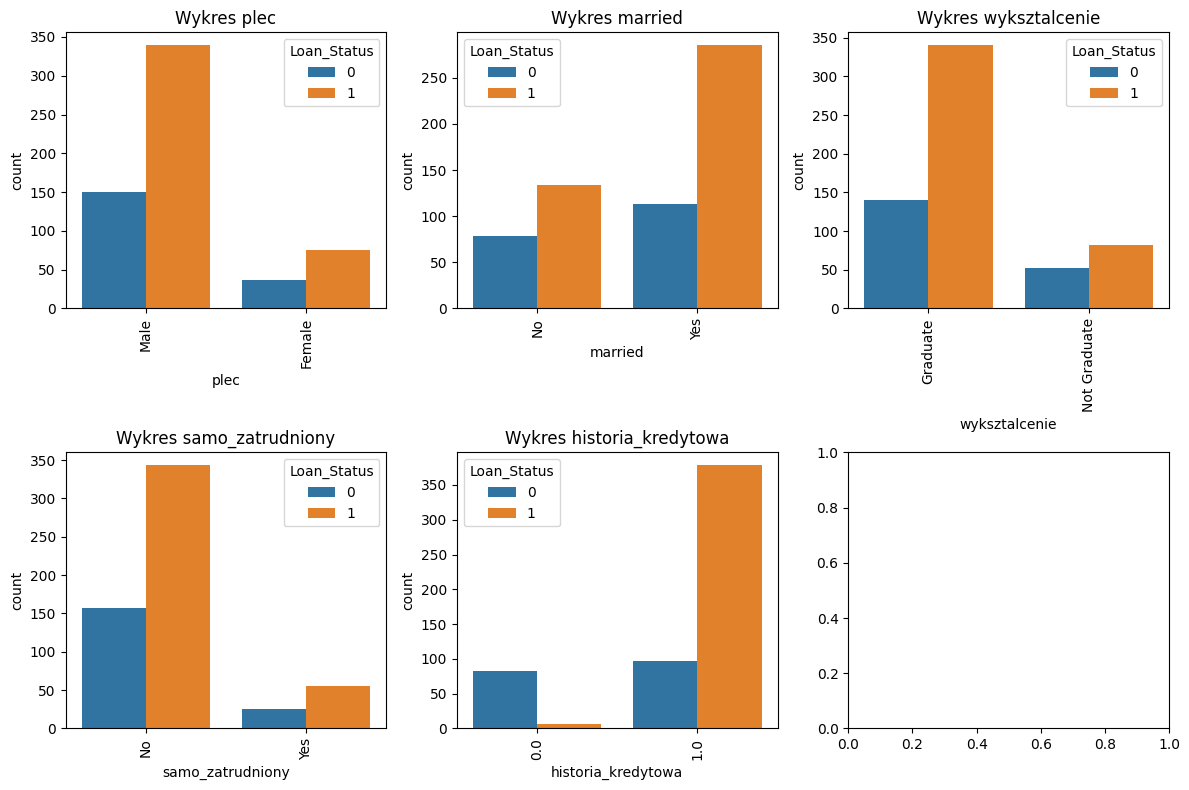

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['plec', 'married',  'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']

num_features = len(cat_features)
ncols = 3
nrows = (num_features + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='Loan_Status', data=data, ax=axes[i])
    axes[i].set_title(f'Wykres {col}')
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [12]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# for col in cat_features:
#   plt.figure(figsize=(10, 6))
#   sns.countplot(x=col, hue='Loan_Status', data=data)
#   plt.title(f'Wykres {col}')
#   plt.xticks(rotation=90)
#   plt.show()

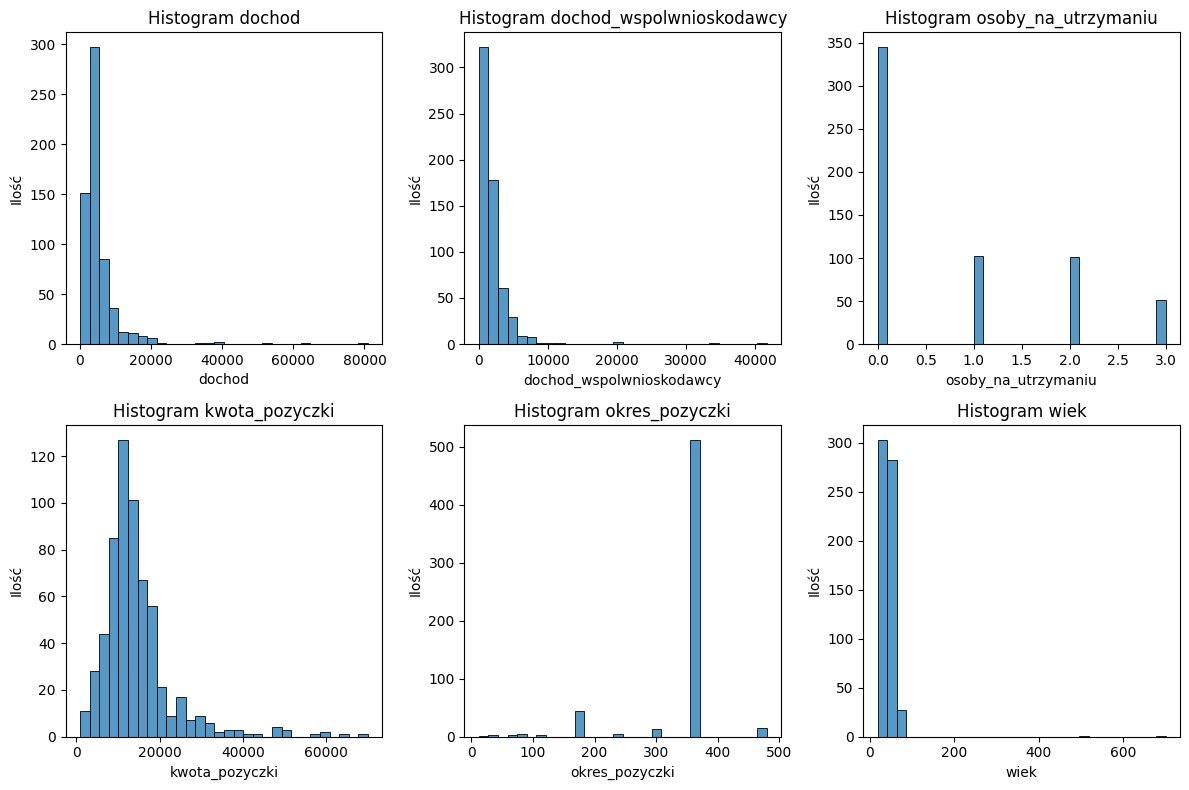

In [13]:
num_features = ['dochod', 'dochod_wspolwnioskodawcy', 'osoby_na_utrzymaniu', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']

num_plots = len(num_features)

ncols = 3
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(data[col], bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Ilość')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
data = data[data['wiek'] < 100]

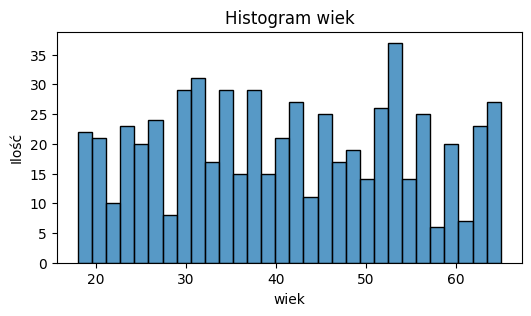

In [15]:
plt.figure(figsize=(6,3))
sns.histplot(data['wiek'], bins=30)
plt.title('Histogram wiek')
plt.xlabel('wiek')
plt.ylabel('Ilość')
plt.show()

In [16]:
# for i in num_features:
#   plt.figure(figsize=(10,6))
#   sns.histplot(data[i], bins=30)
#   plt.title(f'Histogram {i}')
#   plt.xlabel(i)
#   plt.ylabel('Ilość')
#   plt.show()

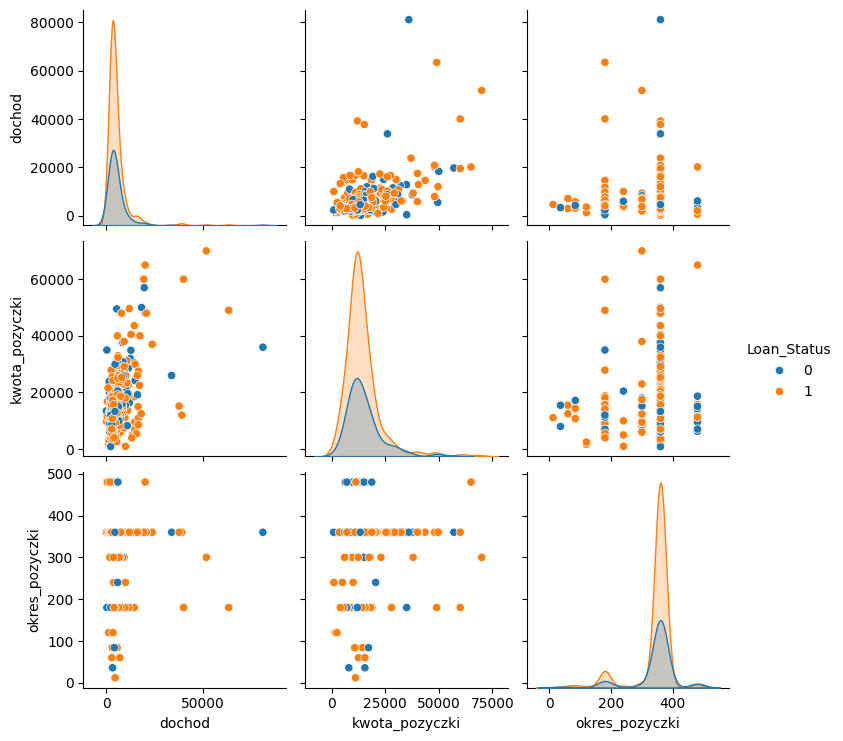

In [17]:
import seaborn as sns
sns.pairplot(data[['dochod', 'kwota_pozyczki', 'wyksztalcenie', 'okres_pozyczki',  'Loan_Status']], hue="Loan_Status")

In [18]:
from sklearn.model_selection import train_test_split
y = data["Loan_Status"]
X = data.drop("Loan_Status", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(489, 11)
(123, 11)
(489,)
(123,)


In [19]:
X_train.head()

,plec,married,osoby_na_utrzymaniu,wyksztalcenie,samo_zatrudniony,dochod,dochod_wspolwnioskodawcy,kwota_pozyczki,okres_pozyczki,historia_kredytowa,wiek
385,Male,No,1.0,Graduate,NaN,3667,0.0,11300.0,180.0,1.0,25
526,Male,Yes,0.0,Graduate,No,3775,0.0,11000.0,360.0,1.0,43
453,Male,Yes,0.0,Graduate,No,2483,2466.0,9000.0,180.0,0.0,39
164,Male,Yes,0.0,Graduate,No,9323,0.0,7500.0,180.0,1.0,25
118,Male,Yes,0.0,Graduate,No,5568,2142.0,17500.0,360.0,1.0,64


In [20]:
# data['plec'].fillna('Male', inplace=True)
# data['osoby_na_utrzymaniu'].fillna(0, inplace=True)
# data['samo_zatrudniony'].fillna('No', inplace=True)
# data['okres_pozyczki'].fillna(data['okres_pozyczki'].mean(), inplace=True)
# data['historia_kredytowa'].fillna(data['historia_kredytowa'].median(), inplace=True)
# data.isna().sum()

In [21]:
num_features = ['dochod', 'dochod_wspolwnioskodawcy', 'osoby_na_utrzymaniu', 'kwota_pozyczki', 'okres_pozyczki', 'wiek']
cat_features = ['plec', 'married',  'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']

# X_train[cat_features] = X_train[cat_features].astype(str)
# X_test[cat_features] = X_test[cat_features].astype(str)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('one_hot_encoder', OneHotEncoder())
])



preprocess_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

X_train_processed = preprocess_pipeline.fit_transform(X_train)

In [23]:
X_train_processed[0]

array([-0.27373399, -0.54510392,  0.25596436, -0.40002759, -2.71538095,
       -1.18702029,  0.        ,  1.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ])

###LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_processed, y_train)

X_test_processed = preprocess_pipeline.transform(X_test)

y_pred = log_reg.predict(X_test_processed)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7886178861788617

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.38      0.54        39
           1       0.77      0.98      0.86        84

    accuracy                           0.79       123
   macro avg       0.83      0.68      0.70       123
weighted avg       0.81      0.79      0.76       123



In [27]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[15 24]
 [ 2 82]]


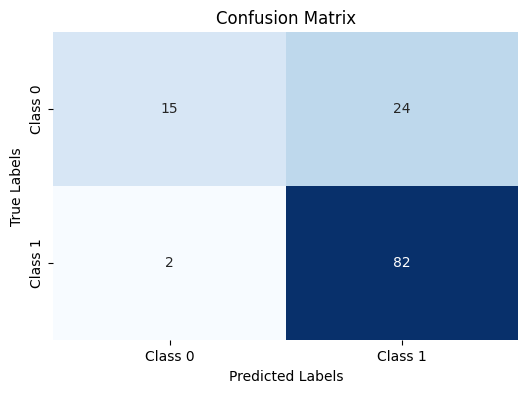

In [28]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train_processed, y_train)

RandomForestClassifier(random_state=0)

In [30]:
y_pred = model.predict(X_test_processed)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.38      0.53        39
           1       0.77      0.96      0.86        84

    accuracy                           0.78       123
   macro avg       0.80      0.67      0.69       123
weighted avg       0.79      0.78      0.75       123

0.7804878048780488


Confusion Matrix:


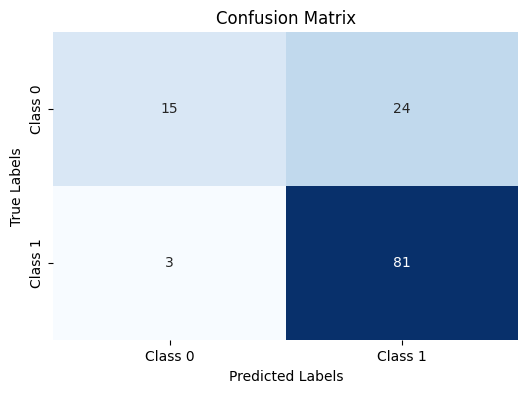

In [32]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

plt.figure(figsize=(6, 4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### xgb.XGBClassifier

In [33]:
import xgboost as xgb

xgBoost = xgb.XGBClassifier(n_estimators=50, random_state=42)
xgBoost.fit(X_train_processed, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
y_pred = xgBoost.predict(X_test_processed)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.50        39
           1       0.76      0.93      0.84        84

    accuracy                           0.76       123
   macro avg       0.74      0.66      0.67       123
weighted avg       0.75      0.76      0.73       123

0.7560975609756098


Confusion Matrix:


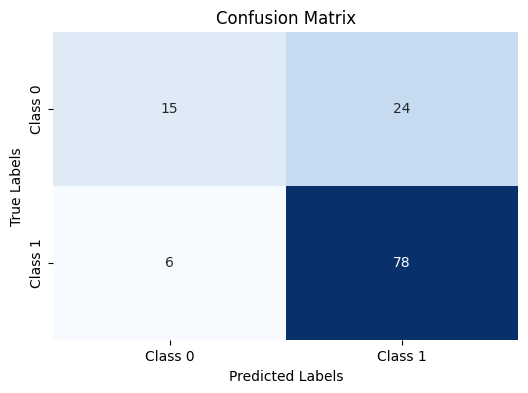

In [35]:
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

###SVC

In [36]:
from sklearn.svm import SVC

svm_clf = SVC(C=0.1,kernel='linear')
svm_clf.fit(X_train_processed, y_train)

SVC(C=0.1, kernel='linear')

In [37]:
y_pred = svm_clf.predict(X_test_processed)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.38      0.55        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.69      0.71       123
weighted avg       0.83      0.80      0.77       123

0.7967479674796748


Confusion Matrix:


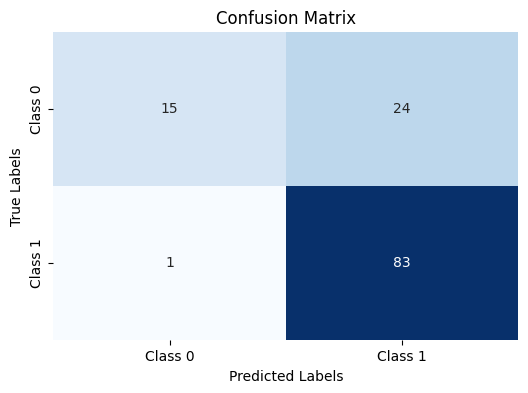

In [38]:
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

##Przykładowy klient

In [39]:
klient_data = {
    'plec': ['Male'],
    'married': ['Yes'],
    'osoby_na_utrzymaniu': [1],
    'wyksztalcenie': ['Graduate'],
    'samo_zatrudniony': ['No'],
    'dochod': [2000],
    'dochod_wspolwnioskodawcy': [500.0],
    'kwota_pozyczki': [50000.0],
    'okres_pozyczki': [200.0],
    'historia_kredytowa': [1.0],
    'wiek': [50]
}


klient_data_df = pd.DataFrame(klient_data)

# cat_features = ['plec', 'married', 'osoby_na_utrzymaniu', 'wyksztalcenie', 'samo_zatrudniony', 'historia_kredytowa']
# klient_data_df[cat_features] = klient_data_df[cat_features].astype(str)

klient_data_processed = preprocess_pipeline.transform(klient_data_df)

# ustawiam wybrany model
y_klient_pred = svm_clf.predict(klient_data_processed)

print("Przewidywany status pozyczki:", 'TAK - udzielimy kredytu' if y_klient_pred[0] == 1 else 'NIE - nie udzielamy kredytu')

Przewidywany status pozyczki: TAK - udzielimy kredytu


#Przykład 2 - owoce

In [40]:
!wget https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt

--2024-09-04 06:20:32--  https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/fruit_data_with_colors.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2370 (2.3K) [text/plain]
Saving to: ‘fruit_data_with_colors.txt’

fruit_data_with_col 100%[===================>]   2.31K  --.-KB/s    in 0s      

2024-09-04 06:20:33 (29.4 MB/s) - ‘fruit_data_with_colors.txt’ saved [2370/2370]



In [41]:
import pandas as pd
df = pd.read_csv("fruit_data_with_colors.txt",sep = '\t')
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [43]:
df[['fruit_label','fruit_name']].value_counts()

,,count
fruit_label,fruit_name,
1,apple,19
3,orange,19
4,lemon,16
2,mandarin,5


In [44]:
df = df.drop('fruit_name', axis=1)
df = df.drop('fruit_subtype', axis=1)
df.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


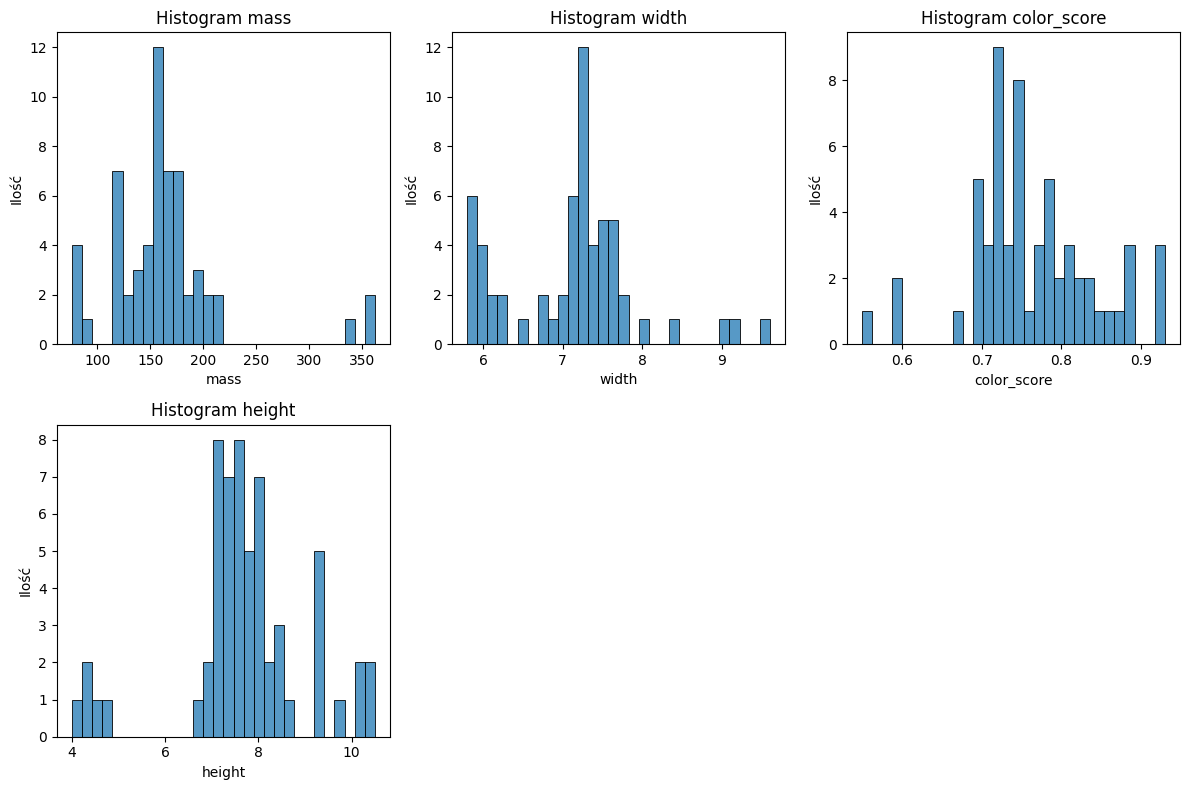

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['mass', 'width', 'color_score', 'height']

num_plots = len(num_features)

ncols = 3
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4 * nrows))

axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col], bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Ilość')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

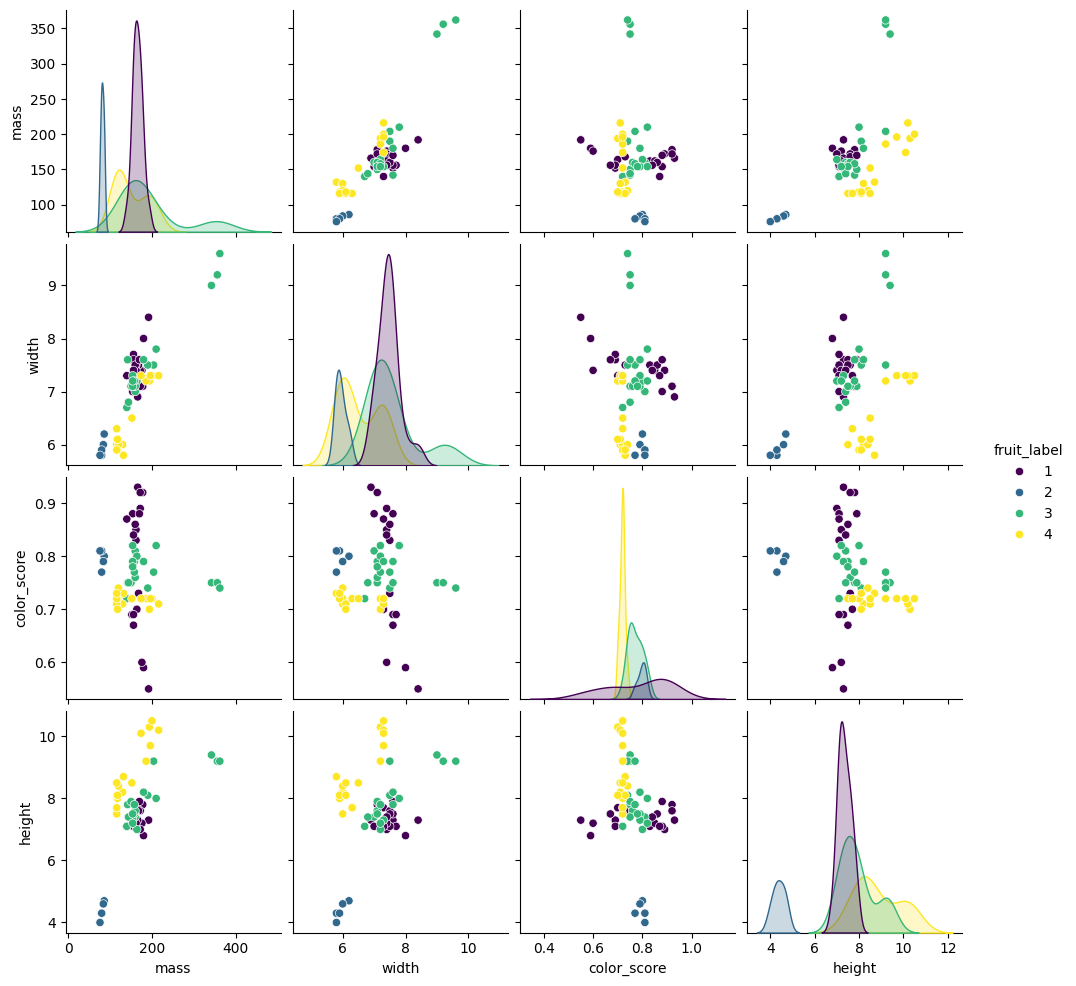

In [46]:
import seaborn as sns
sns.pairplot(df[['mass', 'width', 'color_score', 'height','fruit_label']], hue="fruit_label", palette='viridis')

<Axes: >

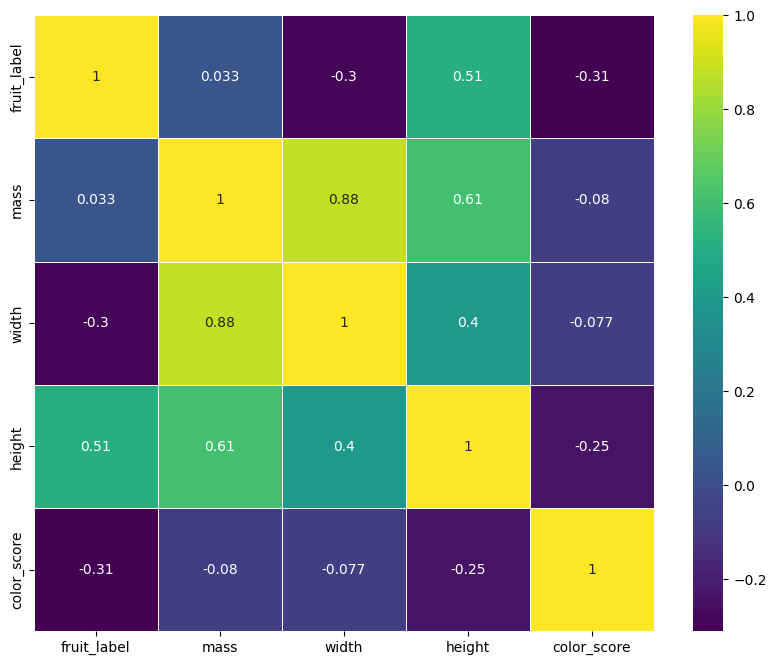

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=.5)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['fruit_label']
X = df.drop('fruit_label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
def train_and_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy for {model_name}:", accuracy_score(y_test, y_pred))

In [50]:
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# import xgboost as xgb

from sklearn.metrics import accuracy_score

train_and_evaluate_model(LogisticRegression(), 'Logistic Regression', X_train_scaled, y_train, X_test_scaled, y_test)
train_and_evaluate_model(RandomForestClassifier(), 'Random Forest', X_train_scaled, y_train, X_test_scaled, y_test)
train_and_evaluate_model(KNeighborsClassifier(), 'KNN', X_train_scaled, y_train, X_test_scaled, y_test)

Accuracy for Logistic Regression: 0.75
Accuracy for Random Forest: 1.0
Accuracy for KNN: 1.0


In [51]:
clf = RandomForestClassifier()
clf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [52]:
df.columns

Index(['fruit_label', 'mass', 'width', 'height', 'color_score'], dtype='object')

In [53]:
mapping_dict = {
    1: 'apple',
    2: 'mandarin',
    3: 'orange',
    4: 'lemon'
}

In [54]:
X_new = pd.DataFrame({'mass': [600],
                      'width': [7.7],
                      'height': [6.0],
                      'color_score': [0.80]})
X_new_scaled = scaler.transform(X_new)
y_pred = clf.predict(X_new_scaled)
# print(y_pred)
print(f"Przewidywany owoc: {mapping_dict[y_pred[0]]}")

Przewidywany owoc: orange
